In [1]:
# Import Analysis Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

print(data.shape)

data.head()

(37137, 10)


,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


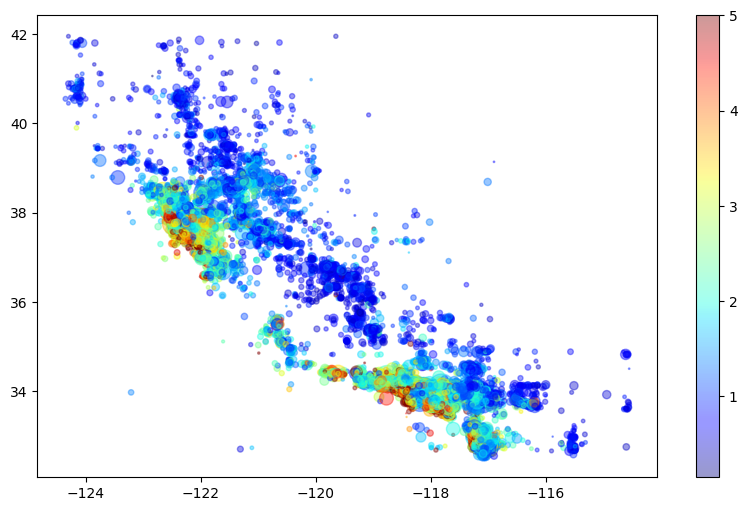

In [9]:
# Plot the longitude and latitude of the data

plt.figure(figsize=(10, 6))
 
plt.scatter(data['Longitude'], data['Latitude'], alpha=0.4, s=data['Population']/100, label='Population', c=data['MedHouseVal'], cmap=plt.get_cmap('jet'))

# Add a colorbar

plt.colorbar()

<AxesSubplot: >

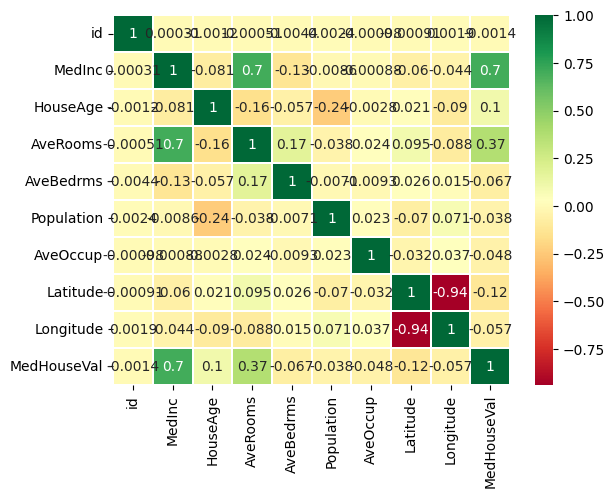

In [10]:
# Correlation Map

sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

In [12]:
# Feature Engineering

import json
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
tqdm.pandas()


# Reads California coastline coordinates.
# (https://earthworks.stanford.edu/catalog/stanford-vx275xn8886) @kaivanbrunt
path = r'C:\Users\commo\OneDrive - University of Virginia\School\STEM\DATA\Kaggle\Regression\Housing Regression\ca_st1.json'
with open(path, 'r') as f:
    coastline = json.load(f)
    features = coastline['features']

# Unpacks California coastline coordinates and builds a dataframe. shape=(25693, 2) 
cstl_coords = [features[i]['geometry']['coordinates'] for i in range(len(features))]
cstl_coords = np.hstack(cstl_coords).reshape((-1, 2))
cstl_df = pd.DataFrame(cstl_coords, columns=['Longitude', 'Latitude'])

# Finds the shortest distance to the coastline (Euclidian Distance).
def f(lat, lon, df):
    return (((df.Latitude - lat)**2 + (df.Longitude - lon)**2)**.5).min()
data['dist_to_cstl'] = data.progress_apply(lambda x: f(x.Latitude, x.Longitude, cstl_df), axis=1)

  0%|          | 0/37137 [00:00<?, ?it/s]

Text(0.5, 0, 'Distance to Coastline')

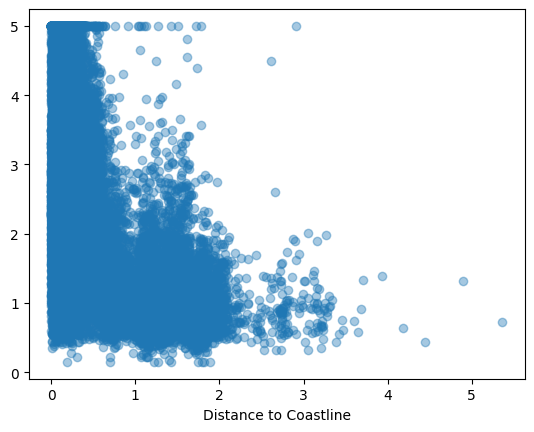

In [15]:
plt.scatter(data['dist_to_cstl'], data['MedHouseVal'], alpha=0.4)

plt.xlabel('Distance to Coastline')

In [21]:
# Correlation Between Distance to Coastline and Median House Value

data.corr()['MedHouseVal']['dist_to_cstl']

-0.4729557044931721

In [22]:
# Drop Longitude and Latitude

data.drop(['Longitude', 'Latitude'], axis=1, inplace=True)

9


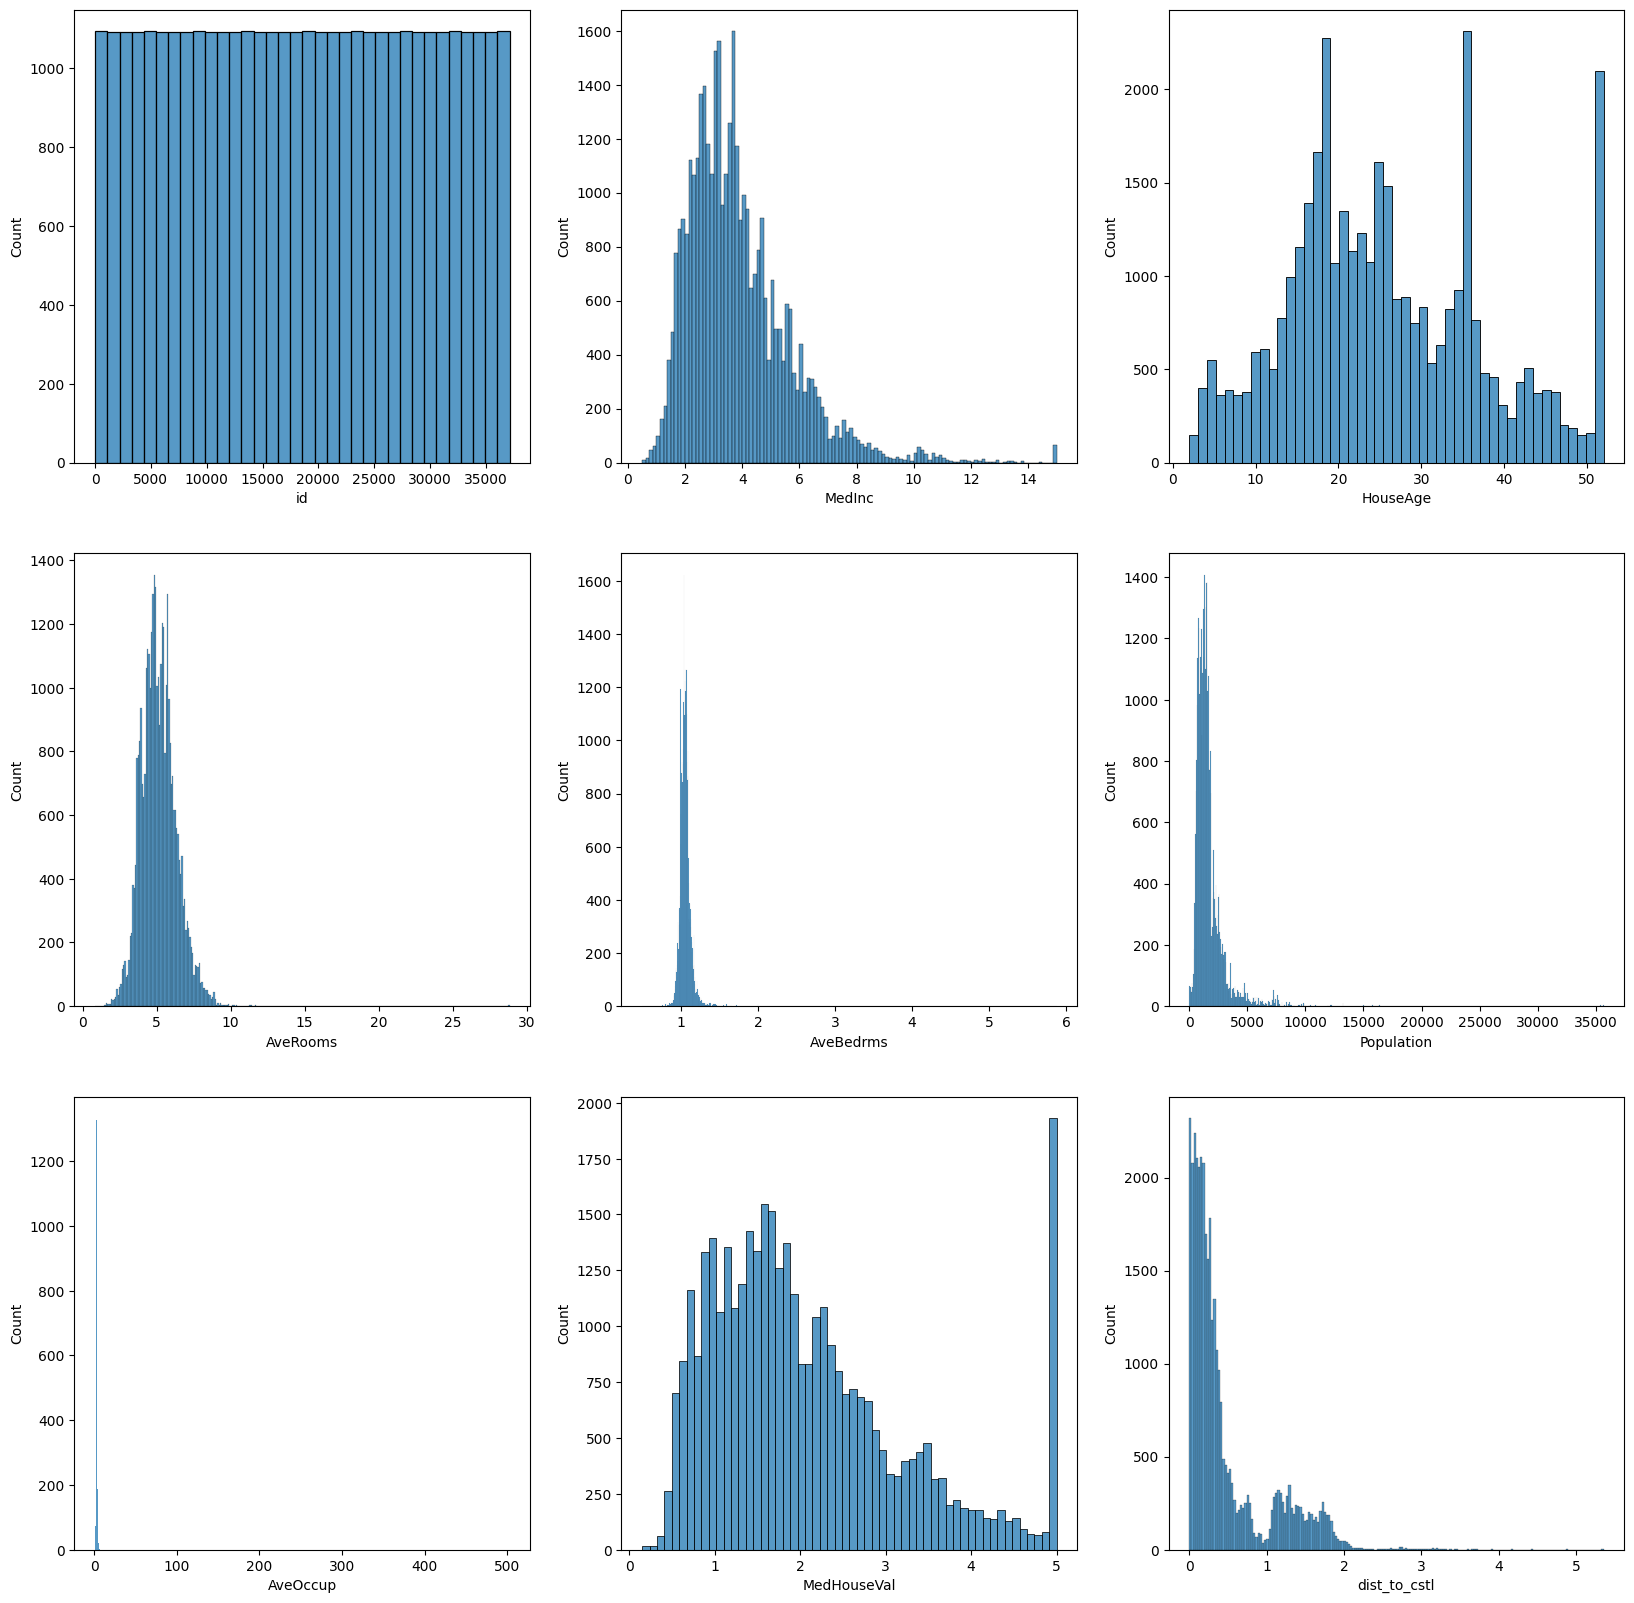

In [27]:
# Plot the distributions of all the features

print(len(data.columns))

fig, ax = plt.subplots(3, 3, figsize=(20, 20))

for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=ax[i//3, i%3])

In [28]:
print(data.columns)

Index(['id', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'MedHouseVal', 'dist_to_cstl'],
      dtype='object')


In [30]:
# Log Transform the Data 

data['MedInc'] = np.log1p(data['MedInc'])
data['HouseAge'] = np.log1p(data['HouseAge'])
data['AveRooms'] = np.log1p(data['AveRooms'])
data['AveBedrms'] = np.log1p(data['AveBedrms'])
data['Population'] = np.log1p(data['Population'])
data['AveOccup'] = np.log1p(data['AveOccup'])



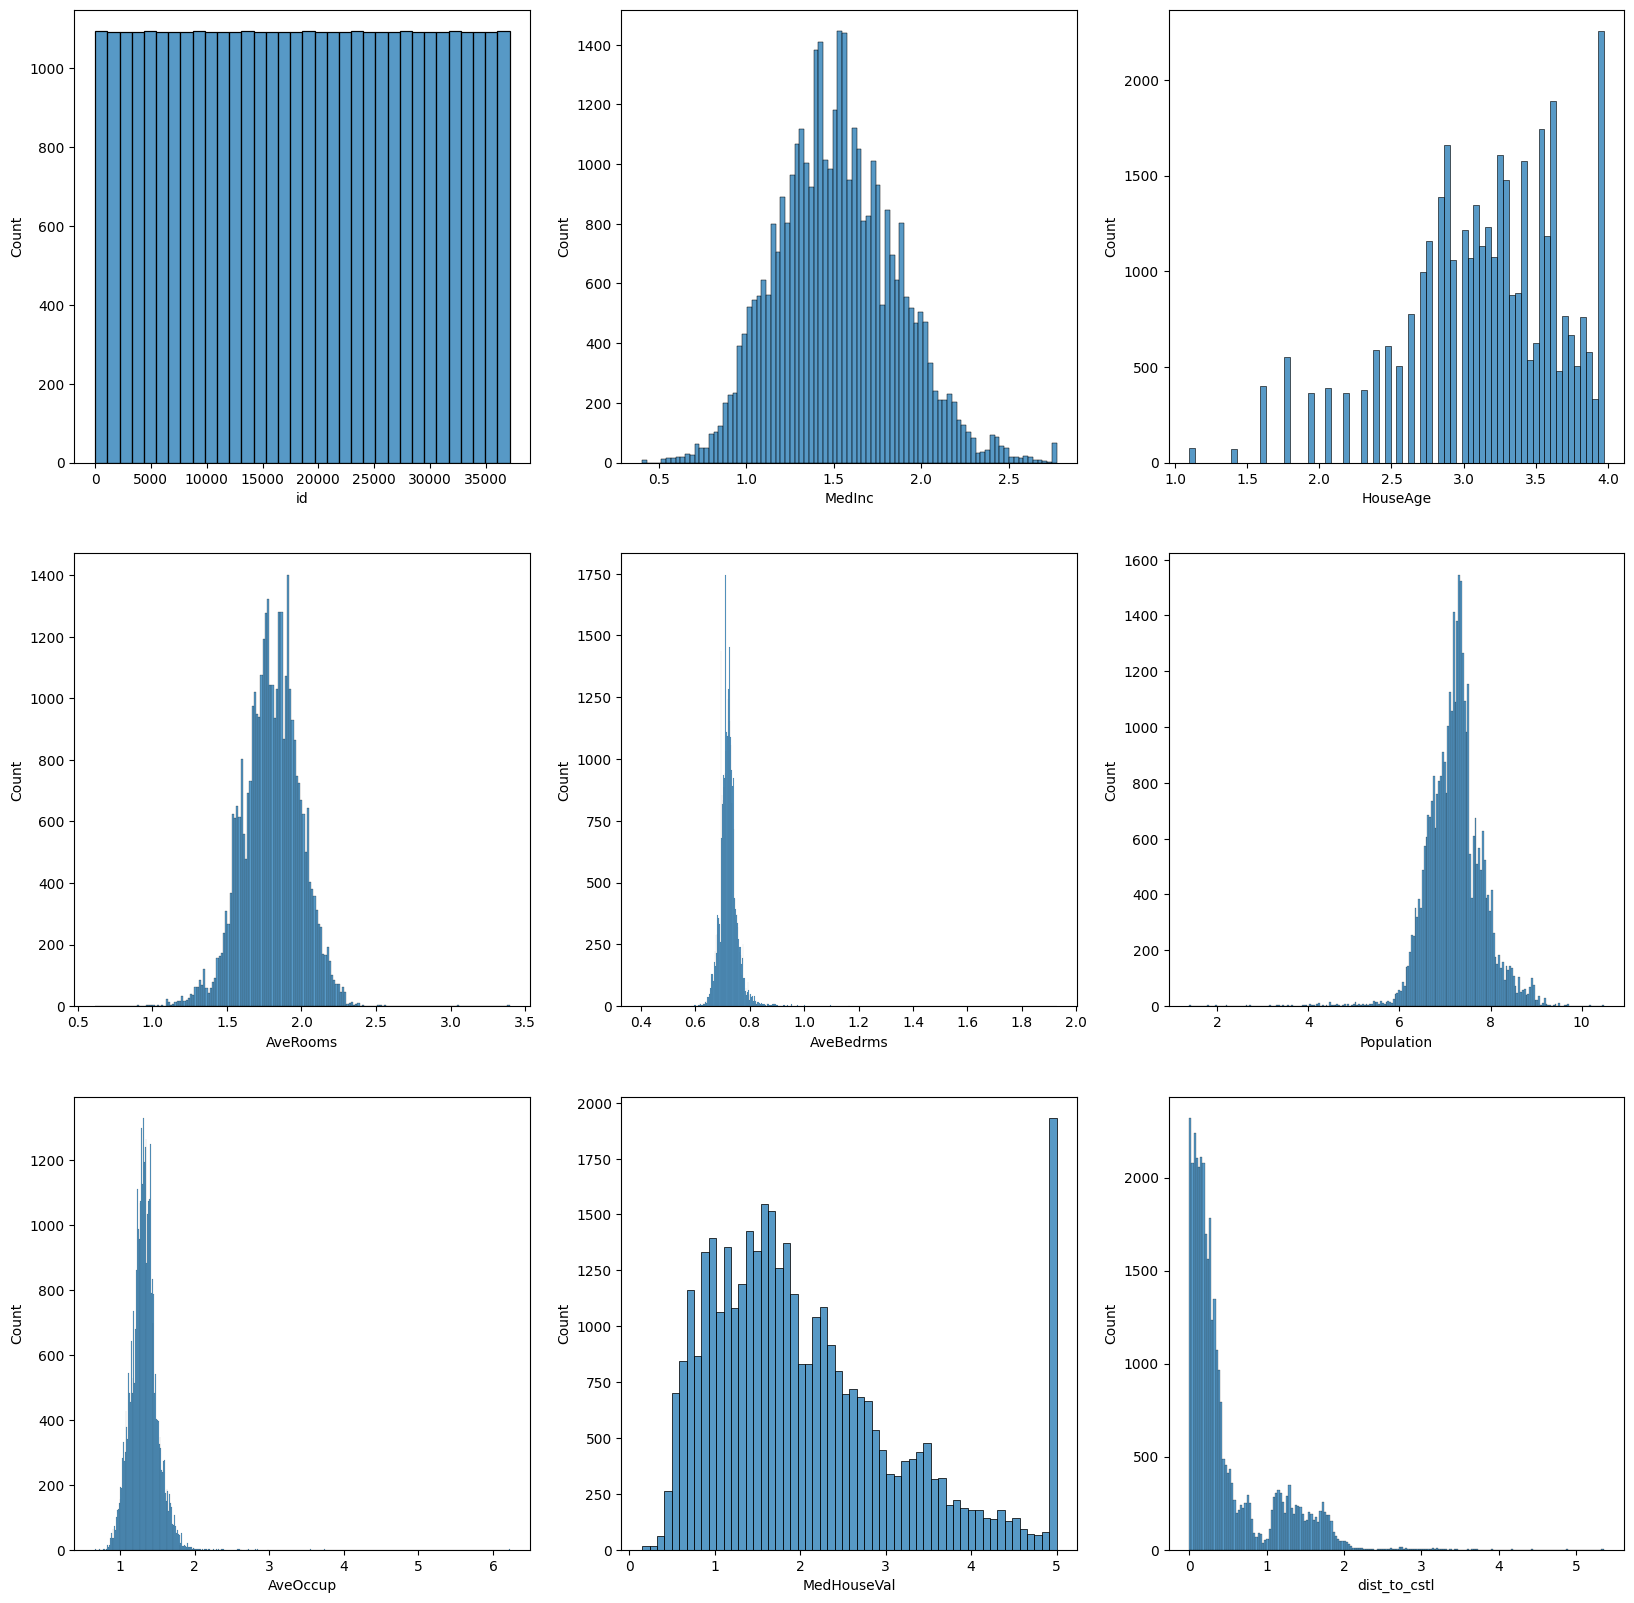

In [31]:
# Plot the distributions of all the features

fig, ax = plt.subplots(3, 3, figsize=(20, 20))

for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=ax[i//3, i%3])

In [32]:
# Write X to CSV

x = data.drop('MedHouseVal', axis=1)

x.to_csv('x.csv', index=False)

# Write y to CSV

y = data['MedHouseVal']

y.to_csv('y.csv', index=False)

##### Test Preprocessing

In [34]:
test = pd.read_csv('test.csv')

test['dist_to_cstl'] = test.progress_apply(lambda x: f(x.Latitude, x.Longitude, cstl_df), axis=1)
test.drop(['Longitude', 'Latitude'], axis=1, inplace=True)

test['MedInc'] = np.log1p(test['MedInc'])
test['HouseAge'] = np.log1p(test['HouseAge'])
test['AveRooms'] = np.log1p(test['AveRooms'])
test['AveBedrms'] = np.log1p(test['AveBedrms'])
test['Population'] = np.log1p(test['Population'])
test['AveOccup'] = np.log1p(test['AveOccup'])

test.to_csv('x_test.csv', index=False)


  0%|          | 0/24759 [00:00<?, ?it/s]

In [36]:
print(x.shape)

(37137, 8)


In [35]:
print(test.shape)

(24759, 8)
